### (1a)

In [1]:
import pandas as pd
import numpy as np

# Importing our data using pandas
data = pd.read_csv("facerecognition.dat", delimiter=" ")

# Book defines our y to be a 1 or 0 (the match) and z as the absolute difference in eye region pixel intensity (eyediff)
y = data['match'].to_numpy().reshape(1042,1)
z = data['eyediff'].to_numpy().reshape(1042,1)

# We need our z matrix to be a certain dimension for when we multiply it by beta
# To do this, we will create a column of ones and add them together
ones = np.ones((1042,1))
z = np.hstack((ones,z))

# Number of rows in our data set
n = y.size

# Newton updating equation for beta
def update_beta(beta,W,Z,y,pi,Hessian):
    return beta + Hessian.dot((np.transpose(Z).dot((y-pi))))

# Updating equation for pi with each iteration
def update_pi(Z,beta):
    return 1/(1+np.exp(-Z.dot(beta)))

# Defining our starting beta array
beta1 = np.array([0.95913,0]).reshape(2,1)

# Defining a starting matrix filled with 0's
W = np.zeros((n,n))

# Looping through and calculating pi and inputting it into our diagonal matrix
beta1_values = []
beta_xa = []
beta_ya = []
iterations = []
appendedlist = []
beta1_values.append(beta1)
for i in range(5):
    iterations.append(i)
    beta1_values.append(beta1)
    beta_xa.append(beta1_values[i][0])
    beta_ya.append(beta1_values[i][1])
    pi = update_pi(z,beta1)
    np.fill_diagonal(W,pi*(1-pi))
    Hessian = np.linalg.inv(np.linalg.multi_dot((np.transpose(z),W,z)))
    data_value = [i,beta1,Hessian]
    appendedlist.append(data_value)
    beta1 = update_beta(beta1,W,z,y,pi,Hessian)
    
print("Table for Beta_0=0.95913, Beta_1=0")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Beta','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Beta_0=0.95913, Beta_1=0


"Iteration,t",Beta,Hessian
0,[[0.95913] [0. ]],[[ 0.01096355 -0.11774922] [-0.11774922 2.24636741]]
1,[[ 1.72028763] [-13.90963144]],[[ 0.01376919 -0.14444378] [-0.14444378 2.43426036]]
2,[[ 1.75721969] [-13.38389891]],[[ 0.01399076 -0.14439871] [-0.14439871 2.40178607]]
3,[[ 1.75870063] [-13.40003398]],[[ 0.01400062 -0.1445039 ] [-0.1445039 2.40316643]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


### (1b)

In [2]:
print("Table for Beta_0=0, Beta_1=0")
# Defining our starting beta array
beta = np.array([0,0]).reshape(2,1)

# Defining a starting matrix filled with 0's
W = np.zeros((n,n))

# Looping through and calculating pi and inputting it into our diagonal matrix
beta_values = []
beta_xb = []
beta_yb = []
iterations = []
appendedlist = []
for i in range(5):
    iterations.append(i)
    beta_values.append(beta)
    beta_xb.append(beta_values[i][0])
    beta_yb.append(beta_values[i][1])
    pi = update_pi(z,beta)
    np.fill_diagonal(W,pi*(1-pi))
    Hessian = np.linalg.inv(np.linalg.multi_dot((np.transpose(z),W,z)))
    data_value = [i,beta,Hessian]
    appendedlist.append(data_value)
    beta = update_beta(beta,W,z,y,pi,Hessian)
print(beta_xb)
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Beta','Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

Table for Beta_0=0, Beta_1=0
[array([0]), array([1.5016127]), array([1.74440309]), array([1.75865273]), array([1.75870116])]


"Iteration,t",Beta,Hessian
0,[[0] [0]],[[ 0.00878375 -0.09433803] [-0.09433803 1.79973903]]
1,[[ 1.5016127 ] [-11.14408376]],[[ 0.01246462 -0.12936371] [-0.12936371 2.21900238]]
2,[[ 1.74440309] [-13.26669118]],[[ 0.01390619 -0.14355394] [-0.14355394 2.39141906]]
3,[[ 1.75865273] [-13.3995696 ]],[[ 0.0140003 -0.14450065] [-0.14450065 2.40312566]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


### (1c)

Text(0,10,'xb_0')

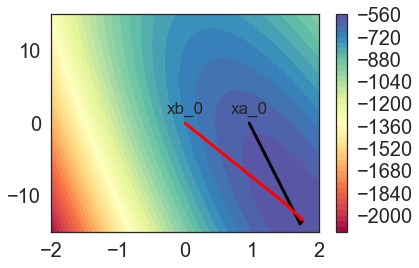

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

beta_0 = np.linspace(-2, 2, 100)
beta_1 = np.linspace(-15, 15, 100)

# make a meshgrid
b_0, b_1 = np.meshgrid(beta_0, beta_1)

# Log-liklihood from the book
def f(y,z,beta_0, beta_1):
    beta = np.array([beta_0,beta_1]).reshape(2,1)
    pi = update_pi(z,beta)
    b = -np.log(1-pi)
    return (np.transpose(y).dot(z)).dot(beta)-np.transpose(b).dot(ones)
# y.T @ (Z @ beta) + np.sum(np.log(1-pi_fun(Z,beta))) This shouldn't need a loop?

Zmesh = np.zeros((b_0.shape[0],b_1.shape[0]))

for i in range(b_0.shape[0]):
    for j in range(b_1.shape[0]):
        b0 = b_0[i,j]; b1 = b_1[i,j]
        Zmesh[i,j]=f(y,z,b0,b1)

plt.contourf(b_0,b_1,Zmesh, 40, cmap='Spectral')
plt.colorbar()
plt.plot(beta_xa,beta_ya,'k-')
plt.plot(beta_xb,beta_yb,'r-')
plt.annotate('xa_0', (0.95913,0),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)
plt.annotate('xb_0', (0,0),textcoords="offset points", xytext=(0,10), ha='center',fontsize=17)

### (2a) MLE

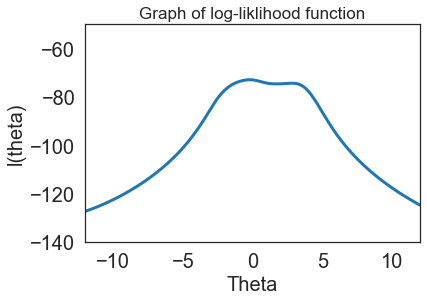

Theta = -11.0
Number of iterations:  23
Final Solution:  -52555770.65820089
Theta = -1.0
Number of iterations:  3
Final Solution:  -0.19228646762465865
Theta = 0.0
Number of iterations:  3
Final Solution:  -0.19228661322559543
Theta = 1.5
Number of iterations:  4
Final Solution:  1.7135868348079242
Theta = 4.0
Number of iterations:  4
Final Solution:  2.8174724368887514
Theta = 4.7
Number of iterations:  4
Final Solution:  -0.19228651191810667
Theta = 7.0
Number of iterations:  8
Final Solution:  41.040847821035634
Theta = 8.0
Number of iterations:  24
Final Solution:  -73291849.1171099
Theta = 38.0
Number of iterations:  4
Final Solution:  42.7953778536672

Mean = 5.106
Number of iterations:  8
Final Solution:  54.87661791171686


In [17]:
cauchy_vals = np.asarray([1.77,-0.23,2.76,3.8,3.47,56.75,-1.34,4.24,-2.44,3.29,3.71,-2.4,4.53,-0.07,-1.05,-13.87,-2.53,-1.75,0.27,43.21])
def log_liklihood(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append(-np.log(1+(x[i]-theta)**2))
    
    total = np.asarray(total)
    total=total.sum(axis=0)
    return total-n*np.log(np.pi)

thetas = np.linspace(-12, 12, 1000)
plt.plot(thetas,log_liklihood(cauchy_vals,thetas))
plt.axis([-12, 12, -140, -50])
plt.xlabel('Theta',fontsize=20)
plt.ylabel('l(theta)',fontsize=20)
plt.title('Graph of log-liklihood function',fontsize=17)
plt.show()

def lprime(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append((2*(x[i]-theta))/(1+(x[i]-theta)**2))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def lprime_2(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append(((2*(theta**2-2*theta*x[i]+x[i]**2-1))/((theta**2-2*theta*x[i]+x[i]**2+1)**2)))
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def newton_method(x,theta,tolerance,param):
    theta_values = [theta]
    num_iterations = 0
    max_iterations = 2000
    
    while((num_iterations < max_iterations) and (abs(lprime(x,theta)) > tolerance)):
        theta = theta - (lprime(x,theta)/lprime_2(x,theta))
        theta_values.append(theta)
        num_iterations+=1
    
    # Printing results
    if(param==1):
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", theta_values[num_iterations])
    elif(param==2):
        return theta_values[num_iterations]

start_pts = np.asarray([-11,-1, 0, 1.5, 4, 4.7, 7, 8, 38])

for element in start_pts:
    print("Theta =",element)
    val = newton_method(cauchy_vals,element,0.000001,1)

print()
print("Mean =",cauchy_vals.mean())
newton_method(cauchy_vals,cauchy_vals.mean(),0.000001,1)

I would say that the mean of the data set is not a good starting place for using the Newton-Raphson method. When I used it, it went to 54.8766 which is not even on the graph. This means that it was diverging and not converging to the value that we wanted. Several other values did converge to the correct maximum - -1,0, and 4.7 all converged to -0.1922 which by the graph, looks to be correct. Everything else started diverging which means that there is only a specific range of values that are actually good to use when wanting to converge to our maximum using this method. 

### (2b) Bisection

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The bisection method
def bisection_method(a,b,x):
    
    num_iterations = 0
    max_iterations = 100
    tolerance = 0.000001 # 1*10^-6
    
    # First check to see if the points entered are valid
    if(a > b or b < a or x > b or x < a):
        print("Your bounds are not valid to use this method. Please try again.")
        return
    elif(lprime(cauchy_vals,a)*lprime(cauchy_vals,b) > 0):
        print("Your bounds do not include a root. Please try again.")
        return
    else:
        # Adding the starting values to the list
        interval_a = [a]
        interval_b = [b]
        x_values = [x]
        
        # For graphing later
        x_axis_vals = np.linspace(a, b, 1000)
        
        # Checking to see if we hit the maximum number of iterations or reached our tolerance
        while((num_iterations < max_iterations) and (abs(lprime(cauchy_vals,x)) > tolerance)):
            
            num_iterations = num_iterations+1

            # Checking to see which half of the graph we are going to follow
            if(lprime(cauchy_vals,a)*lprime(cauchy_vals,x) <= 0):
                b = x
                x = 0.5*(a+b)
            elif(lprime(cauchy_vals,a)*lprime(cauchy_vals,x) > 0):
                a = x
                x = 0.5*(a+b)

            # Appending the new values to the list
            interval_a.append(a)
            interval_b.append(b)
            x_values.append(x)
        
        # Now we've finished all of our iterations and it's time for results!
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", x_values[num_iterations])

# Run the method!
bisection_method(-1,1,0)
bisection_method(-2,4,3)
bisection_method(-1,5,2)

Number of iterations:  20
Final Solution:  -0.19228649139404297
Number of iterations:  20
Final Solution:  -0.19228649139404297
Number of iterations:  22
Final Solution:  2.817472219467163


With starting points of -1,5 and an x of 2, I found that the bisection method did not converge to the correct maximum. This means that I wasn't in the correct range that would allow convergence to the true maximum and that I instead converged to one of the other maximums. This is a danger with this method; it might not always find the true maximum depending on all of your starting points. 

### (2c) Fixed Point

In [6]:
alpha = [1, 0.64, 0.25]
tolerance = .00000000001
print("Given values")
for val in alpha:
    iterations = 0
    theta = -1 # Our starting value
    while(lprime(cauchy_vals,theta) > tolerance):
        theta = theta + val*lprime(cauchy_vals,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)
print()
print("Changing alphas and theta")
others = [0.8,0.1]
for val in others:
    iterations = 0
    theta = 1 # Our starting value
    while(lprime(cauchy_vals,theta) > tolerance):
        theta = theta + val*lprime(cauchy_vals,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)

print()
print("Changing theta")
for val in alpha:
    iterations = 0
    theta = 1 # Our starting value
    while(lprime(cauchy_vals,theta) > tolerance):
        theta = theta + val*lprime(cauchy_vals,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)
print()
print("Changing alphas")
others = [0.8,0.1]
for val in others:
    iterations = 0
    theta = -1 # Our starting value
    while(lprime(cauchy_vals,theta) > tolerance):
        theta = theta + val*lprime(cauchy_vals,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)

Given values
Alpha = 1
Final Solution for Fixed Point:  0.9214155618890301
Number of iterations:  1
Alpha = 0.64
Final Solution for Fixed Point:  0.22970595960897922
Number of iterations:  1
Alpha = 0.25
Final Solution for Fixed Point:  -0.19228661323134705
Number of iterations:  19

Changing alphas and theta
Alpha = 0.8
Final Solution for Fixed Point:  1
Number of iterations:  0
Alpha = 0.1
Final Solution for Fixed Point:  1
Number of iterations:  0

Changing theta
Alpha = 1
Final Solution for Fixed Point:  1
Number of iterations:  0
Alpha = 0.64
Final Solution for Fixed Point:  1
Number of iterations:  0
Alpha = 0.25
Final Solution for Fixed Point:  1
Number of iterations:  0

Changing alphas
Alpha = 0.8
Final Solution for Fixed Point:  0.5371324495112242
Number of iterations:  1
Alpha = 0.1
Final Solution for Fixed Point:  -0.19228661323232268
Number of iterations:  73


Other values of alpha and theta did not work as well for converging to our maximum. When theta was equal to 1, it didn't matter what theta was, it would not converge and gave a final solution of 1. When theta was equal to -1, it seemed that lower alpha values were more likely to converge to the actual maximum we wanted at -0.1922.

### (2d) Secant

In [7]:
theta_0 = [-3,-2]
theta_1 = [3,-1]
tolerance = .000000000001
print("For given starting values: ")
for i in range(len(theta_0)):
    iterations = 0
    x0=theta_0[i]
    x1=theta_1[i]
    f1 = lprime(cauchy_vals,x0)
    f2 = lprime(cauchy_vals,x1)
    while(abs(x0-x1) > tolerance):
        x2 = x1 - lprime(cauchy_vals,x1)*(x1-x0)/(lprime(cauchy_vals,x1)-lprime(cauchy_vals,x0))
        x0 = x1; 
        x1 = x2; 
        f1 = f1; 
        f2 = lprime(cauchy_vals,x2)
        iterations += 1
    print("Theta 0 =",theta_0[i])
    print("Theta 1 =",theta_1[i])
    print("Final Solution for Secant Method: ",x2)
    print("Iterations: ",iterations)
    
print()
print("Changing up our values:")
theta_0 = [-2,3,-2]
theta_1 = [3,-1,-3]
for i in range(len(theta_0)):
    iterations = 0
    x0=theta_0[i]
    x1=theta_1[i]
    f1 = lprime(cauchy_vals,x0)
    f2 = lprime(cauchy_vals,x1)
    while(abs(x0-x1) > tolerance):
        x2 = x1 - lprime(cauchy_vals,x1)*(x1-x0)/(lprime(cauchy_vals,x1)-lprime(cauchy_vals,x0))
        x0 = x1; 
        x1 = x2; 
        f1 = f1; 
        f2 = lprime(cauchy_vals,x2)
        iterations += 1
    print("Theta 0 =",theta_0[i])
    print("Theta 1 =",theta_1[i])
    print("Final Solution for Secant Method: ",x2)
    print("Iterations: ",iterations)

For given starting values: 
Theta 0 = -3
Theta 1 = 3
Final Solution for Secant Method:  2.8174721655731316
Iterations:  8
Theta 0 = -2
Theta 1 = -1
Final Solution for Secant Method:  -0.19228661322965113
Iterations:  8

Changing up our values:
Theta 0 = -2
Theta 1 = 3
Final Solution for Secant Method:  2.8174721655731316
Iterations:  9
Theta 0 = 3
Theta 1 = -1
Final Solution for Secant Method:  2.8174721655731316
Iterations:  10
Theta 0 = -2
Theta 1 = -3
Final Solution for Secant Method:  -0.19228661322965082
Iterations:  8


When you use other starting choices, you are not guarenteed to converge to your absolute maximum. The closer our starting points are (-2 and -3 or -1 and -2), the more likely that we will converge to -0.1922 which is what we want. With our other pairs of starting numbers ((-3,3),(-2,3),(3,-1)), we did not converge to our maximum and it was probably because the values were too far away to "make it into" the region where convergence was possible. 

### (2e)

Of the four methods, the Newton method seemed to be the fastest at finding the root (3-4 iterations) while the next fastest was the secant method (8 iterations). Bisection and Fixed Point Iteration were not very good because they each had 20+ iterations to find the correct root. I also think Newton's method is best because it requires one starting point to be in the correct region of convergence while secant method needs two values to be close enough together and in the correct region to actually converge. We will now do this all again but with a normal distribution. 

In [8]:
n = cauchy_vals.size
mean, sigma = 2, 1
random_nums = np.random.normal(mean, sigma, n)

# defining functions
def normal_log_liklihood(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append((x[i]-theta)**2)
    total = np.asarray(total)
    total=total.sum(axis=0)
    return -(n/2)*np.log(2*np.pi)-(1/2)*total

def normal_lprime(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append(x[i]-theta)
    total = np.asarray(total)
    summation = total.sum(axis=0)
    return summation

def normal_lprime_2(x,theta):
    n = x.size
    return -n

print("NEWTON'S METHOD")
def newton_method(x,theta,tolerance,param):
    theta_values = [theta]
    num_iterations = 0
    max_iterations = 2000
    
    while((num_iterations < max_iterations) and (abs(normal_lprime(x,theta)) > tolerance)):
        theta = theta - (normal_lprime(x,theta)/normal_lprime_2(x,theta))
        theta_values.append(theta)
        num_iterations+=1
    
    # Printing results
    if(param==1):
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", theta_values[num_iterations])
    elif(param==2):
        return theta_values[num_iterations]

start_pts = np.asarray([-11,-1, 0, 1.5, 4, 4.7, 7, 8, 38])

for element in start_pts:
    print("Theta =",element)
    val = newton_method(random_nums,element,0.000001,1)

print()
print("Mean =",random_nums.mean())
newton_method(random_nums,random_nums.mean(),0.000001,1)
print()

print("BISECTION METHOD")
def bisection_method(a,b,x):
    
    num_iterations = 0
    max_iterations = 100
    tolerance = 0.000001 # 1*10^-6
    
    # First check to see if the points entered are valid
    if(a > b or b < a or x > b or x < a):
        print("Your bounds are not valid to use this method. Please try again.")
        return
    elif(normal_lprime(random_nums,a)*normal_lprime(random_nums,b) > 0):
        print("Your bounds do not include a root. Please try again.")
        return
    else:
        # Adding the starting values to the list
        interval_a = [a]
        interval_b = [b]
        x_values = [x]
        
        # For graphing later
        x_axis_vals = np.linspace(a, b, 1000)
        
        # Checking to see if we hit the maximum number of iterations or reached our tolerance
        while((num_iterations < max_iterations) and (abs(normal_lprime(random_nums,x)) > tolerance)):
            
            num_iterations = num_iterations+1

            # Checking to see which half of the graph we are going to follow
            if(normal_lprime(random_nums,a)*normal_lprime(random_nums,x) <= 0):
                b = x
                x = 0.5*(a+b)
            elif(normal_lprime(random_nums,a)*normal_lprime(random_nums,x) > 0):
                a = x
                x = 0.5*(a+b)

            # Appending the new values to the list
            interval_a.append(a)
            interval_b.append(b)
            x_values.append(x)
        
        # Now we've finished all of our iterations and it's time for results!
        if(num_iterations == max_iterations):
            print("You reached the maximum number of iterations.")
        else:
            print("Number of iterations: ",num_iterations)
        print("Final Solution: ", x_values[num_iterations])

# Run the method!
bisection_method(-1,3,0)
bisection_method(-2,4,3)
bisection_method(-1,5,2)
print()

print("FIXED POINT METHOD")
alpha = [1, 0.64, 0.25]
tolerance = .00000000001
print("Given values")
for val in alpha:
    iterations = 0
    theta = -1 # Our starting value
    while(normal_lprime(random_nums,theta) > tolerance):
        theta = theta + val*normal_lprime(random_nums,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)
print()
print("Changing alphas and theta")
others = [0.8,0.1]
for val in others:
    iterations = 0
    theta = 1 # Our starting value
    while(normal_lprime(random_nums,theta) > tolerance):
        theta = theta + val*normal_lprime(random_nums,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)

print()
print("Changing theta")
for val in alpha:
    iterations = 0
    theta = 1 # Our starting value
    while(normal_lprime(random_nums,theta) > tolerance):
        theta = theta + val*normal_lprime(random_nums,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)
print()
print("Changing alphas")
others = [0.8,0.1]
for val in others:
    iterations = 0
    theta = -1 # Our starting value
    while(normal_lprime(random_nums,theta) > tolerance):
        theta = theta + val*normal_lprime(random_nums,theta)
        iterations += 1
    print("Alpha =",val)
    print("Final Solution for Fixed Point: ",theta)
    print("Number of iterations: ",iterations)
print()

print("SECANT METHOD")
theta_0 = [-3,-2]
theta_1 = [3,-1]
tolerance = .000000000001
print("For given starting values: ")
for i in range(len(theta_0)):
    iterations = 0
    x0=theta_0[i]
    x1=theta_1[i]
    f1 = normal_lprime(random_nums,x0)
    f2 = normal_lprime(random_nums,x1)
    while(abs(x0-x1) > tolerance):
        x2 = x1 - normal_lprime(random_nums,x1)*(x1-x0)/(normal_lprime(random_nums,x1)-normal_lprime(random_nums,x0))
        x0 = x1; 
        x1 = x2; 
        f1 = f1; 
        f2 = normal_lprime(random_nums,x2)
        iterations += 1
    print("Theta 0 =",theta_0[i])
    print("Theta 1 =",theta_1[i])
    print("Final Solution for Secant Method: ",x2)
    print("Iterations: ",iterations)
    
print()
print("Changing up our values:")
theta_0 = [-2,3,-2]
theta_1 = [3,-1,-3]
for i in range(len(theta_0)):
    iterations = 0
    x0=theta_0[i]
    x1=theta_1[i]
    f1 = normal_lprime(random_nums,x0)
    f2 = normal_lprime(random_nums,x1)
    while(abs(x0-x1) > tolerance):
        x2 = x1 - normal_lprime(random_nums,x1)*(x1-x0)/(normal_lprime(random_nums,x1)-normal_lprime(random_nums,x0))
        x0 = x1; 
        x1 = x2; 
        f1 = f1; 
        f2 = normal_lprime(random_nums,x2)
        iterations += 1
    print("Theta 0 =",theta_0[i])
    print("Theta 1 =",theta_1[i])
    print("Final Solution for Secant Method: ",x2)
    print("Iterations: ",iterations)

NEWTON'S METHOD
Theta = -11.0
Number of iterations:  1
Final Solution:  2.0972441264657906
Theta = -1.0
Number of iterations:  1
Final Solution:  2.0972441264657924
Theta = 0.0
Number of iterations:  1
Final Solution:  2.097244126465792
Theta = 1.5
Number of iterations:  1
Final Solution:  2.0972441264657924
Theta = 4.0
Number of iterations:  1
Final Solution:  2.0972441264657924
Theta = 4.7
Number of iterations:  1
Final Solution:  2.0972441264657924
Theta = 7.0
Number of iterations:  1
Final Solution:  2.0972441264657933
Theta = 8.0
Number of iterations:  1
Final Solution:  2.0972441264657933
Theta = 38.0
Number of iterations:  1
Final Solution:  2.097244126465796

Mean = 2.097244126465792
Number of iterations:  0
Final Solution:  2.097244126465792

BISECTION METHOD
Number of iterations:  24
Final Solution:  2.097244083881378
Number of iterations:  23
Final Solution:  2.097244143486023
Number of iterations:  25
Final Solution:  2.0972441136837006

FIXED POINT METHOD
Given values
Alph

When I reran all of my code from (2a)-(2d) for the Normal distribution with mean=2, I found that, once again, Newton's method was the best method. It seemed to find the maximum in 1 iteration whereas secant found the maximum in 2 iterations. Bisection and Fixed Point were not good and in fact, Fixed Point did not converge to the maximum at all with the same numbers as I used before. Bisection was able to converge to the maximum but took 24-26 iterations which is higher than it was for the Cauchy distribution and much higher than Newton or Secant. I would say no, my conclusions did not change when moving from the Cauchy distribution to the Normal distribution. 

### (3)

In [9]:
# A parameter θ has a Gamma(2, 1) posterior distribution. Find the 95% highest posterior density interval for θ, 
# that is, the interval containing 95% of the posterior probability for which the posterior density for every point 
# contained in the interval is never lower than the density for every point outside the interval. Since the gamma 
# density is unimodal, the interval is also the narrowest possible interval containing 95% of the posterior probability.

Area: 0.951207104273593
0.06705406129286677
4.827892413086407


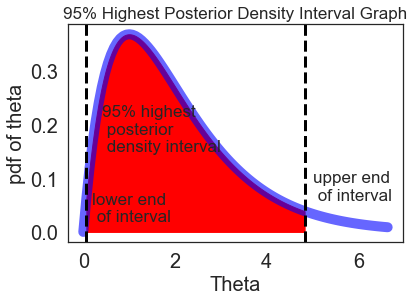

In [10]:
from scipy.stats import gamma

# We are given this in the problem
a = 2
# Finding our values
x = np.linspace(gamma.ppf(0, a), gamma.ppf(0.99, a), 100)
y_vals = gamma.pdf(x, a)
plt.plot(x, y_vals,'b-', lw=10, alpha=0.6, label='gamma pdf')

## Maximum 
maxy = y_vals.max()
indexy = y_vals.argmax()

step_size = (maxy/10000)
area = 0
num_iterations = 0
max_iterations = 11000

while(area <= 0.95 and (num_iterations < max_iterations)):
    y = maxy - num_iterations*(step_size)
    values = np.abs(y_vals - y)
    left_array = values[0:indexy]
    right_array = values[indexy:-1]
    left_min_idx = left_array.argmin()
    right_min_idx = right_array.argmin()
    left_min = x[left_min_idx]
    right_min= x[len(left_array)+right_min_idx]
    area = gamma.cdf(right_min,a) - gamma.cdf(left_min,a)
    num_iterations += 1
print("Area:",area)
print(left_min)
print(right_min)

plt.axvline(left_min, color = 'k', ls='--')
plt.axvline(right_min, color = 'k', ls='--')
plt.annotate('lower end \n of interval',xy=(0.2,0.02),fontsize=17)
plt.annotate('upper end \n of interval',xy=(5,0.06),fontsize=17)
plt.annotate('95% highest \n posterior \n density interval',xy=(0.4,0.15),fontsize=17)
plt.xlabel('Theta',fontsize=20)
plt.ylabel('pdf of theta',fontsize=20)
hi = np.arange(left_min, right_min, 0.01)
plt.fill_between(hi, gamma.pdf(hi, a), color = 'r')
plt.title('95% Highest Posterior Density Interval Graph',fontsize=17)
plt.show()